# Importance sampling: toy example

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid

import matplotlib.pyplot as plt

Functions for generation and visualization of the image batches

In [2]:
def visualize_img_batch(batch):
    '''Visualizes image batch'''
    grid = make_grid(batch, nrow=8, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)
    plt.imshow(grid.permute(1,2,0))
    plt.show()

In [15]:
def random_image_data(size=(1024, 3, 8, 8), ratio=0.5):
    '''Makes a random image batch of size (batch_size, height, width, channels) 
    with black to white ratio of value ratio
    '''
    idx = torch.randperm(size[0])[:int(ratio*size[0])]
    image_batch = torch.zeros(size) + 0.2 # to make light gray
    image_batch[idx] = 1 - 0.2 # to make light gray 
    return image_batch

The dataset class

In [16]:
def dummy_weight_network(img):
    '''Returns weight based on image (toy example)'''
    return img.mean()

In [17]:
class BlackWhiteDataset(Dataset):
    '''The dataloader for the black and white images'''
    def __init__(self, weight_network):
        self.dataset = random_image_data()
        
        self.weight_network = weight_network

    def __len__(self):
        return len(self.dataset)
    
    def accept_sample(self, weight_network, img):
        # Returns True if the image is accepted, False if rejected
        weight = weight_network(img)
        return bool(list(torch.utils.data.sampler.WeightedRandomSampler([1-weight, weight], 1))[0])
    
    def __getitem__(self, idx):
        # Random permutation on the dataset order (is this equivalent to uniform sampling?)
        all_idx = torch.randperm(len(dataset))
        
        # Loop through the samples and return once accepted
        for i in all_idx:
            accept = self.accept_sample(self.weight_network, self.dataset[i])
            if accept:
                return self.dataset[i]

The dataloader to iterate over batches

In [18]:
dataset = BlackWhiteDataset(dummy_weight_network)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)

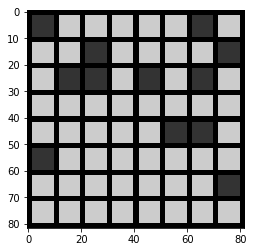

In [20]:
for data in dataloader:
    visualize_img_batch(data)
    break